In [1]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pysph.solver.utils import load, iter_output, get_files
import pandas as pd
import os

file_base = "E:\IIT Bombay\Winter Project - 2019\SLP-Smoothed-Particle-Hydrodynamics\SLP\Cavity\PySPH-Testing"


global savefig_additional 
global figTitle1
global figTitle2
global figTitle3

In [2]:
def extract_RT(file_loc):

    from os import walk
    files = []
    for (dirpath, dirnames, filenames) in walk(file_loc):
        files.extend(filenames)
        break

    fname = ''
    for i in files:
        if i.endswith('.log'):
            fname = i

    file_loc += '/' + fname
    data = open(file_loc, 'r')
    lines = data.read()
    rt = float(lines[lines.find('Run took: ')+10:].split(' secs')[0])
    data.close()

    return rt

def custom_plot1(sph_schm, sph_schm_legend, sz=(11,10), save=False, adjust_bot=0.2):
    sns.set_style("ticks", {'axes.facecolor': '#EAEAF2', 'axes.grid': True})
    n = len(sph_schm)
    fig, axs = plt.subplots(1, 1, figsize=sz)

    cnt, RT = 0, []
    for schm in sph_schm:        
        file_loc = os.path.join(file_base, 'Outputs', schm, 'results.npz')
        data = np.load(file_loc) # Read data
        leg = sph_schm_legend[schm]
        

        t, ke = data['t'], data['ke']
        
        axs.plot(t, ke, linewidth=2, label=leg)

        file_loc = os.path.join(file_base, 'Outputs', schm)
        RT.append(extract_RT(file_loc))


    # Labels
    axs.set_ylabel(r'Kintic Energy $\rightarrow$', fontsize='large')
    axs.set_xlabel(r't $\rightarrow$', fontsize='large')

    # Titles
    fig.suptitle(figTitle1, fontsize=22)
    axs.set_title('Kinetic Energy of Flow vs Time', fontsize='large')

    fig.tight_layout()
    fig.subplots_adjust(bottom=adjust_bot)
    lines = []
    labels = []
    for ax in fig.axes:
        axLine, axLabel = ax.get_legend_handles_labels()
        lines.extend(axLine)
        labels.extend(axLabel)

    n += 1
    lines, labels = lines[0:n], labels[0:n]

    # Add Runtime scale
    RT = np.array(RT)
    RT_new = 100 * (RT - np.ones_like(RT)*np.min(RT)) / (np.ones_like(RT)*np.min(RT))

    for i in range(n-1):
        temp = RT_new[i]
        if temp == 0.0:
            rt = ' {' + str(round(RT[i], 1)) + 's}'
        else:
            rt = r' {' + str(round(temp, 2)) + r'$\% \uparrow$}'
        labels[i] = labels[i] + rt

    fig.legend(lines, labels, loc = 'lower center', ncol=n, prop={'size': 'large'}, title=r'Legend {$\Delta \%$ Runtime}')

    if save == True:
        tle = os.path.join(file_base, 'Cavity_ke_plot'+ savefig_additional + '.png')
        fig.savefig(tle, dpi=400)

def custom_plot2(sph_schm, sph_schm_legend, sz=(11,10), save=False, adjust_bot=0.2, re=100):

    sns.set_style("ticks", {'axes.facecolor': '#EAEAF2', 'axes.grid': True})
    n = len(sph_schm)
    fig, axs = plt.subplots(2, 1, figsize=sz)

    cnt, RT = 0, []
    for schm in sph_schm:        
        file_loc = os.path.join(file_base, 'Outputs', schm, 'results.npz')
        data = np.load(file_loc) # Read data
        leg = sph_schm_legend[schm]
        
        x, u_c = data['x'], data['u_c']
        axs[0].plot(u_c, x, linewidth=2, label=leg)

        v_c = data['v_c']
        axs[1].plot(x, v_c, linewidth=2, label=leg)

        file_loc = os.path.join(file_base, 'Outputs', schm)
        RT.append(extract_RT(file_loc))

        cnt += 1
        if cnt == n:
            from pysph.examples.ghia_cavity_data import get_u_vs_y, get_v_vs_x
            y, D = get_u_vs_y()
            if re in D:
                axs[0].plot(D[re], y, 'o', fillstyle='none', label='Ghia et al.') 
            x, D = get_v_vs_x()
            if re in D:
                axs[1].plot(x, D[re], 'o', fillstyle='none', label='Ghia et al.')       

    # Labels
    axs[0].set_ylabel(r'$y \rightarrow$', fontsize='large')
    axs[0].set_xlabel(r'$V_x \rightarrow$', fontsize='large')
    axs[1].set_ylabel(r'$V_y \rightarrow$', fontsize='large')
    axs[1].set_xlabel(r'$x \rightarrow$', fontsize='large')

    # Titles
    fig.suptitle(figTitle1, fontsize=22)
    axs[0].set_title('Centerline', fontsize='large')

    fig.tight_layout()
    fig.subplots_adjust(bottom=adjust_bot)
    lines = []
    labels = []
    for ax in fig.axes:
        axLine, axLabel = ax.get_legend_handles_labels()
        lines.extend(axLine)
        labels.extend(axLabel)

    lines, labels = lines[0:n+1], labels[0:n+1]

    # Add Runtime scale
    RT = np.array(RT)
    RT_new = 100 * (RT - np.ones_like(RT)*np.min(RT)) / (np.ones_like(RT)*np.min(RT))

    for i in range(n):
        temp = RT_new[i]
        if temp == 0.0:
            rt = ' {' + str(round(RT[i], 1)) + 's}'
        else:
            rt = r' {' + str(round(temp, 2)) + r'$\% \uparrow$}'
        labels[i] = labels[i] + rt

    fig.legend(lines, labels, loc = 'lower center', ncol=n, prop={'size': 'large'}, title=r'Legend {$\Delta \%$ Runtime}')

    if save == True:
        tle = os.path.join(file_base, 'Cavity_centerline_plot'+ savefig_additional + '.png')
        fig.savefig(tle, dpi=400)

def custom_plot3(sph_schm, sph_schm_legend, sz=(11,10), save=False, adjust_bot=0.2, dnst=(2,2)):

    sns.set_style("ticks", {'axes.facecolor': '#EAEAF2', 'axes.grid': False})
    plt.set_cmap('viridis');
    n = len(sph_schm)
    fig, axs = plt.subplots(2, 2, figsize=sz)

    x = np.linspace(0, 1, 101)
    xx, yy = np.meshgrid(x, x)

    i = 0
    for schm in sph_schm:       
        file_loc = os.path.join(file_base, 'Outputs', schm, 'results.npz')
        data = np.load(file_loc)
        leg = sph_schm_legend[schm]

        u, v = data['u'], data['v']
        vmag = np.sqrt(u**2 + v**2)

        if i <= 1:
            axs[0,i%2].streamplot(xx, yy, u, v, density=dnst, color=vmag)
            axs[0,i%2].set_xlim(0,1)
            axs[0,i%2].set_ylim(0,1)
            axs[0,i%2].set_title(leg, fontsize='large')
        else:
            axs[1,i%2].streamplot(xx, yy, u, v, density=dnst, color=vmag)
            axs[1,i%2].set_xlim(0,1)
            axs[1,i%2].set_ylim(0,1)
            axs[1,i%2].set_title(leg, fontsize='large')
        i += 1

    # Titles
    fig.suptitle(figTitle2, fontsize=22)

    fig.tight_layout()

    if save == True:
        tle = os.path.join(file_base, 'Cavity_streamplot'+ savefig_additional + '.png')
        fig.savefig(tle, dpi=400)

In [3]:
df = pd.read_csv(file_base + "\SPH Scheme - Test - Cavity.csv")
df

,Simulation Number,Scheme,Kernel,nx,hdx,c0,PST,PST_Rh,PST_R_coeff,PST_n_exp
0,0,TVF,QuinticSpline,50,1,10,False,///,///,///
1,1,EDAC,QuinticSpline,50,1,10,False,///,///,///
2,2,TVF - IST,QuinticSpline,50,1,10,False,///,///,///


In [80]:
sph_schm_legend = {
    '00': 'MomVisc',
    '01': 'LamViscPre',
    '02': 'Check Re 1000',
    '03': 'DPSPH Re 100',
    '04': 'DPSPH Re 100 PST',


    '00-0': 'EDAC - Re 100',
    '00-1': 'EDAC - Re 1000',
    '00-2': 'EDAC - Re 10000',
    
    '01-0': 'TVF - Re 100',
    '01-1': 'TVF - Re 1000',
    '01-2': 'TVF - Re 10000',
}

save_bool = False
R = 100
sph_schm = ['00-0', '01-0', '00', '01',]
sph_schm = ['00-0', '01-0', '03', '04',]
name = 'Re = ' + str(R)    


##############
savefig_additional = '_' + name
temp = ' | ' + name
figTitle1 = 'Cavity' + temp
figTitle2 = 'Cavity - Streamplot (10s)' + temp
##############

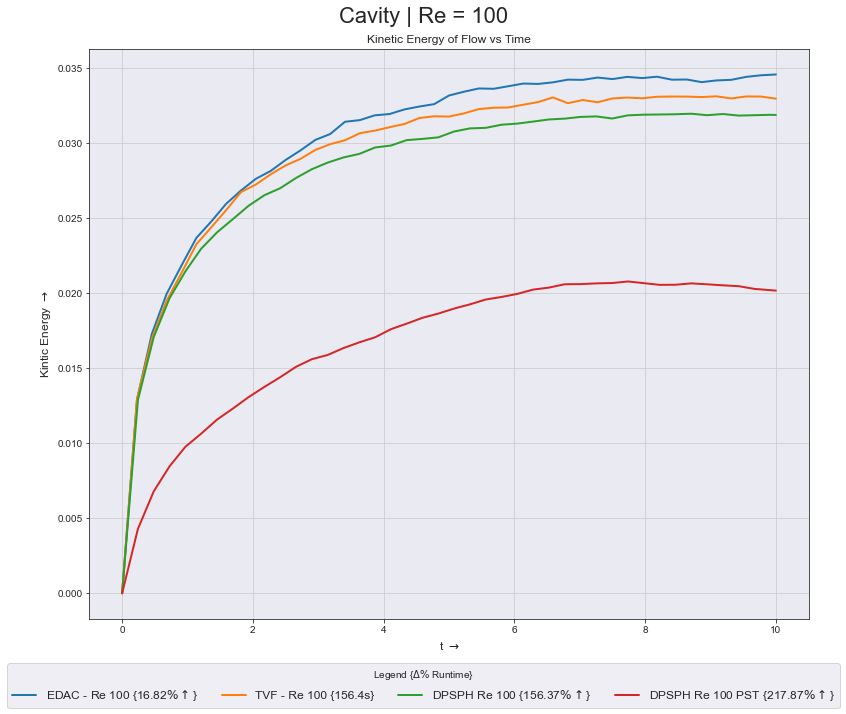

In [81]:
custom_plot1(sph_schm, sph_schm_legend, save=save_bool, adjust_bot=0.13)

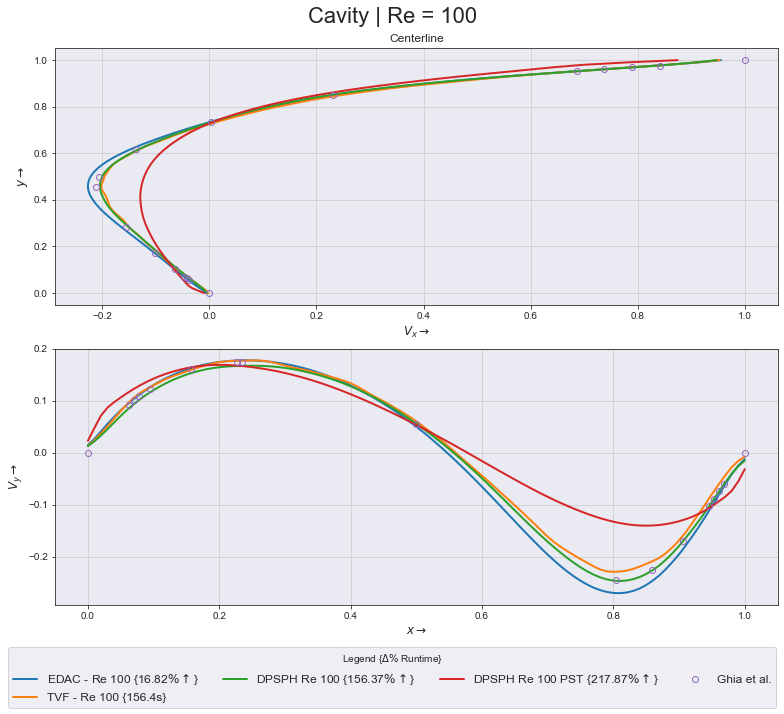

In [82]:
custom_plot2(sph_schm, sph_schm_legend, save=save_bool, adjust_bot=0.15, re=R)

<Figure size 432x288 with 0 Axes>

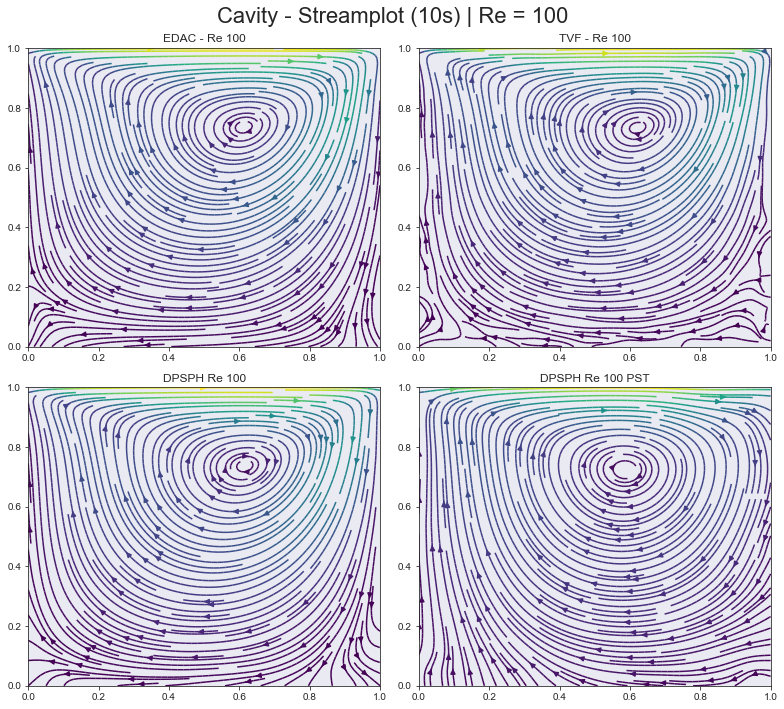

In [83]:
custom_plot3(sph_schm, sph_schm_legend, save=save_bool)